In [ ]:
# importing all the required libraries
import os
import re
import codecs
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from sklearn.datasets import load_files
from sklearn import feature_extraction
from sklearn import metrics

In [ ]:
n_samples = 1000  #number of samples 

In [ ]:
# creating artificial data 
mean = [5, 9] 
cov = [[2.5, 0.8], [0.8, 0.5]]
X_p = np.random.multivariate_normal(mean, cov, n_samples).T
X_p.shape

(2, 1000)

In [ ]:
cov = [[3, -1.3], [-1.3, 1.2]]
X_n_1 = np.random.multivariate_normal([11, 2], cov, int(n_samples/2)).T
X_n_2 = np.random.multivariate_normal([5, 1], cov, n_samples-int(n_samples/2)).T
X_n = np.hstack([X_n_1, X_n_2])
X_n.shape

(2, 1000)

(-4.0, 15.0)

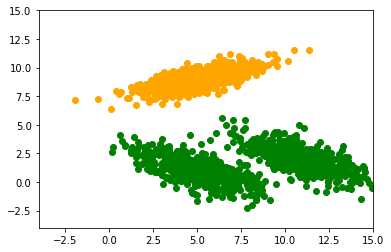

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_p[0], X_p[1], color="orange")
ax.scatter(X_n[0], X_n[1], color="green")
ax.set_ylim(-4, 15)
ax.set_xlim(-4, 15)

In [ ]:
XY_p = np.vstack([X_p, np.ones_like(X_p[0])])
XY_n = np.vstack([X_n, np.zeros_like(X_n[0])])
XY_n.shape

(3, 1000)

In [ ]:

XY = np.hstack([XY_n, XY_p])
data_XY = np.copy(XY).T
np.random.shuffle(data_XY)
data_train = data_XY[:1600]
data_test = data_XY[:400]
data_train.shape

(1600, 3)

In [ ]:
data_train[1]

array([ 6.38750054, 10.21303468,  1.        ])

In [ ]:
data_test[:,:2][0]  # Is this point in class 0 or 1?

array([11.83782005,  3.08786969])

In [ ]:
data_test[:,2][0]  # It is in this class, but we may only guess it with information from data_train!

0.0

In [ ]:
data_train_X = data_train[:, :2]     #separating train data from whole data
data_train_Y = data_train[:, 2]

In [ ]:
data_test_X = data_test[:, :2]        #separating test data from whole data
data_test_Y = data_test[:, 2]

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
data_train_X[:,:2][0], data_train_Y[0]

(array([11.83782005,  3.08786969]), 0.0)

In [ ]:
X_t = np.concatenate((data_train_X, data_test_X), axis =0)   #adding train data and test data to create "X (feture)" variable

In [ ]:
ones = np.ones([len(data_XY), 1])       # creating bias or intecept as new column

In [ ]:
X_total = np.concatenate((ones, X_t), axis=1)  # adding both train data (only features) and bias column

In [ ]:
data_train_wb_X = X_total[:1600]       #this is the shape of the data after adding bias column
data_train_wb_X.shape             

(1600, 3)

In [ ]:
data_test_wb_X= X_total[:400]
data_test_wb_X.shape                  

(400, 3)

In [ ]:
Y_total= np.concatenate((data_train_Y, data_test_Y), axis =0)   #adding train data and test data to create target variable

In [ ]:
data_train_wb_Y = Y_total[:1600]
data_train_wb_Y.shape                        #shape of the target variable train data

(1600,)

In [ ]:
data_test_wb_Y= Y_total[:400]                #shape of the target test data
data_test_wb_Y.shape

(400,)

In [ ]:
parameters= np.zeros([2+1, 1])   # initiatzing first parameters as zeros 

In [ ]:
X_total.shape, Y_total.shape, parameters.shape      #shapes of features, target, and parameters variavles

((2000, 3), (2000,), (3, 1))

In [ ]:
#creating class interface for logistic regression 
class LogisticRegression():
  def __init__(self, X, y, learning_rate=0.1, iterations =500):

    self.learning_rate = learning_rate
    self.iterations = iterations
    self.n_samples = len(Y_total)
    self.trainx = data_train_wb_X
    self.trainy = data_train_wb_Y
    self.X = X_total                      
    self.y = Y_total
    self.train_data = len(data_train_wb_Y)
    self.param = np.zeros([1, 2+1]).T
    self.h =sigmoid(np.dot(X, self.param))                                  # this is the hypothesis we need to calculate
    self.coef = None
    self.intercept = None

  def compute_loss(self, X, y, param, epsilon: float = 1e-5):               #function for calculating loss
    self.h = sigmoid(np.dot(X, self.param))
    self.loss = (1/self.n_samples)*(((-y) @ np.log(self.h + epsilon))-((1-y) @ np.log(1-self.h + epsilon)))  
    return self

  def fit(self):                              #training the model using stochastic gradient descent 
    self.cost_history = np.zeros(self.iterations)
    for iter in range(self.iterations):
      cost =0.0
      for i in range(self.n_samples):
        rand_ind = np.random.randint(0, self.train_data)          #taking random rows from the train data to iteratively update parameters by finding loss 
        self.X_i = self.trainx[rand_ind, :].reshape(1, self.trainx.shape[1])
        self.y_i = self.trainy[rand_ind].reshape(1,1)
        #this is the partial derivative of the stochastic gradient descent equation generlized form
      self.param = self.param - (self.learning_rate/self.n_samples) * (np.dot(self.X_i.T, (sigmoid(np.dot(self.X_i, self.param))) - self.y_i))
      self.cost= self.compute_loss(self.X_i, self.y_i, self.param)
      self.cost_history = self.cost
    return self

  def predict(self, X):                           #function to find traget 
    y = np.round(sigmoid(np.dot(X, self.param)))
    return y

  def get_param(self):
    return self.param 


In [ ]:
logreg = LogisticRegression(X_total,Y_total).fit()

In [ ]:
param = logreg.get_param()           #these are the optimal parameters for this model
param    

array([[-0.00043945],
       [-0.01937725],
       [ 0.04115051]])

In [ ]:
pred_y = logreg.predict(data_test_wb_X)  #predicting targets for test data

In [ ]:
print('Accuracy: %2.2f %%' % (100. * metrics.accuracy_score(data_test_wb_Y, pred_y)))     

Accuracy: 92.00 %
